# L'exo Bonus

Nous sommes en 2237. L'ensemble du système solaire est désormais occupé par l'humanité (on suppose donc que par miracle l'humanité s'est enfin bougée pour limiter le changement climatique et qu'on a survécu... puis qu'on a résolu le problème des radiations, du voyage et de la terraformation, bref un futur à pvalue très faible :)

Vous êtes un(e) valeureux(se) membre de l'IIR (Institut Interplanétaire de Recensement).
Vous venez de recevoir les derniers chiffres d'un sondage des tailles des individus sur les différentes planètes du système et vous devez faire votre rapport.

### Les données :
Le dataframe iir_recensement_2237 contient une mesure par habitant sondé, avec sa planète d'origine, la gravité sur sa planète (g en m/s-2), la distance de sa planète au soleil (Millions de km), la taille de l'habitant (cm) et sa localisation (hemisphere N ou S). 1000 personnes par planète ont été mesurées.

### Les pistes de références : 

https://www.kaggle.com/jgroff/unit-3-hypothesis-testing

https://www.kaggle.com/hamelg/python-for-data-26-anova

https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

https://www.kaggle.com/hamelg/python-for-data-27-linear-regression


### Chargement des données

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### Charger les données
data = pd.read_csv("iir_recensement_2237.csv")

### 0. Validation du cadre d'hypothèse

Pour pouvoir utiliser des outils comme l'ANOVA, il faut que les données respectent certaines hypothèses. Retrouver quelles sont les 3 principales hypothèses et tester celle qui vous parait la plus simple à vérifier.



Les 3 hypothèses principales pour utiliser une ANOVA sont :
- les groupes doivent être indépendents entre eux
- tous les groupes doivent avoir la même variance
- la distribution au sein des groupes doit être gaussienne

Pour vérifier la gaussianité on peut faire un test de normalité/gaussianité. Il en existe plusieurs, prenons par exemple celui du normaltest de scipy :


In [4]:
groups = data.groupby("Planet").groups
planetes = list(groups.keys())

In [5]:
for planete in planetes:    
    pval = stats.normaltest(data.iloc[groups[planete]]["Size"]).pvalue
    print("La p-valeur pour le groupe %s est de %s"%(planete,pval))

La p-valeur pour le groupe Earth est de 0.27986922594376085
La p-valeur pour le groupe Jupiter est de 0.2839313616367496
La p-valeur pour le groupe Mars est de 0.1779675913591199
La p-valeur pour le groupe Moon est de 0.14730050350764348
La p-valeur pour le groupe Neptune est de 0.7282618879508604
La p-valeur pour le groupe Saturn est de 0.1438461847122525
La p-valeur pour le groupe Uranus est de 0.4971429888168709
La p-valeur pour le groupe Venus est de 0.317017439938105


Aucun des test de normalité n'indiquent de p-value très faibles, donc on peut supposer que l'hypothèse de gaussianité est respecté (plus précisement elle n'est pas improbable)

Note : on parle de p-value faible lorsqu'on est à (suivant le problème étudié) 5%, 1%, ...
Lorsqu'on observe un résultat à par exemple 20% (p-value=0.2) c'est déjà beaucoup trop pour rejeter l'hypothèse nulle. Par exemple lorsqu'on lance un dé 6 faces non truqué et qu'on observe un 4, cet évènement n'avait que 1/6=17% de chance de se produire et pourtant le dé n'est effectivement pas truqué...
Donc il n'est pas surprenant de ne pas observer de p-value vraiment proche de 1 lorsque H0 est bien vraie...

### 1. Vivre la tête en bas est-ce bon pour la croissance ?
Votre chef a eu une idée géniale : Et si vivre dans l'hémisphere sud permettait de grandir plus (ça parait logique non vu qu'on grandit dans le même sens de la gravité ? ou pas...)

A vous de vérifier cette hypothèse...

Commencez par tester sur l'ensemble des planètes. Si le résultat vous parait étrange, vous pouvez explorer les populations de chaque planète pour comprendre ce qui se passe...




On va chercher à tester si les données de l'hemisphere Nord et de l'hemisphere Sud appartiennent à la même distribution ou à deux distributions différentes. 

Pour cela on peut utiliser un t-test.

Hypothèse H0 : les deux populations ont la même moyenne.

In [23]:
# test de normalité
print(stats.normaltest(data[data["Hemisphere"]=="S"]["Size"]).pvalue)
print(stats.normaltest(data[data["Hemisphere"]=="N"]["Size"]).pvalue)

0.5462669963146589
6.651560182771927e-06


Les données de l'hémisphère Nord ne semblent pas suivre une loi gaussienne.
On va utiliser la variante du ttest avec equal_var=False (test de Welch)

In [24]:
stats.ttest_ind(data[data["Hemisphere"]=="S"]["Size"],data[data["Hemisphere"]=="N"]["Size"],equal_var=False)

Ttest_indResult(statistic=-10.4089236241694, pvalue=3.275114396131984e-25)

Ouah c'est bizarre la p-value est très basse, donc il semble qu'il y ait une différence significative de la moyenne entre l'hémisphère Nord et l'hémisphere Sud... 
Et effectivement si on affiche les moyennes :

In [27]:
print("Moyenne globale, on voit effectivement une grosse différence")
print(data[data["Hemisphere"]=="N"]["Size"].mean())
print(data[data["Hemisphere"]=="S"]["Size"].mean())

Moyenne globale, on voit effectivement une grosse différence
172.1082070173303
166.6675909601126


Explorons chaque planète :

In [28]:
for planet in planetes:
    print(planet,stats.ttest_ind(data[(data["Hemisphere"]=="S") & (data["Planet"]==planet)]["Size"],data[(data["Hemisphere"]=="N") & (data["Planet"]==planet)]["Size"]))

Earth Ttest_indResult(statistic=0.9807661336086226, pvalue=0.32694577233549527)
Jupiter Ttest_indResult(statistic=-0.9109261600757128, pvalue=0.3625542419154024)
Mars Ttest_indResult(statistic=0.5481081849891922, pvalue=0.5837401934982221)
Moon Ttest_indResult(statistic=-0.6284608632845141, pvalue=0.5298458736361059)
Neptune Ttest_indResult(statistic=1.1190478312014673, pvalue=0.2633889967285965)
Saturn Ttest_indResult(statistic=0.5881853910548369, pvalue=0.5565409376656147)
Uranus Ttest_indResult(statistic=0.8384418280252681, pvalue=0.40198337037978593)
Venus Ttest_indResult(statistic=-0.7824795117805431, pvalue=0.4341184385063074)


Tous les tests planète par planète semblent pourtant montrer que les populations N et S suivent les mêmes distributions...
Regardons les répartitions S et N par planète.

<Axes: xlabel='Planet'>

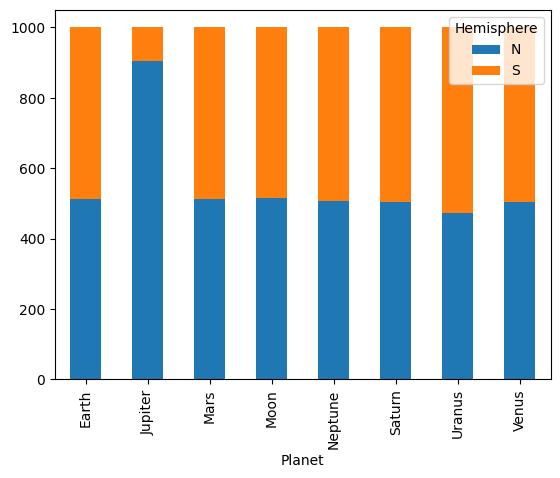

In [8]:
data.groupby(["Planet","Hemisphere"]).size().unstack(level=-1).plot.bar(stacked=True)

Ah voilà l'explication ! Comme sur Jupiter, la plupart des gens habitent dans l'hemisphere Nord (à cause de la Grande tache rouge ?) et que les jupiteriens sont en moyenne beaucoup plus grands que les autres, cela fausse notre test global sur l'influence de l'hemisphere. On parle de facteur confondant.

In [25]:
print("Moyenne sans les données déséquilibrées de Jupiter")
print(data[(data["Hemisphere"]=="N") & (data["Planet"]!="Jupiter")]["Size"].mean())
print(data[(data["Hemisphere"]=="S") & (data["Planet"]!="Jupiter")]["Size"].mean())


Moyenne sans les données déséquilibrées de Jupiter
165.2322635999824
165.8496846226252



### 2. Petit martien deviendra grand...
Depuis quelques temps, les fonctionnaires des nouvelles planètes habitées se plaignent de recevoir des dotations d'uniformes qui ne sont jamais à la bonne taille.
Y aurait-il des différences significatives de croissance à force de vivre sur une planète différente de la Terre ?
Quelles planètes pourraient malgré tout garder les mêmes dotations que la Terre (ça coûte cher de refaire une dotation avec de nouvelles tailles...).



On cherche à tester si les populations sur les différentes planètes suivent la même distribution ou non.

Hypothèse nulle :
le paramètre de moyenne de la gaussienne est le même quelque soit le groupe

Pour faire ce test, on fait donc appel à l'ANOVA :

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Size ~ Planet',                 # Model formula
            data = data).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq      df           F  PR(>F)
Planet    1.326390e+06     7.0  474.280378     0.0
Residual  3.192961e+06  7992.0         NaN     NaN


On a une pvalue très très faible (carrement arrondie à 0.0 dans le tableau) donc on rejette l'hypothèse nulle qui était que tous les groupes appartenaient à la même distribution avec des moyennes identiques. Mais pour savoir quels groupes sont vraiments distincts les uns des autres, on va faire une analyse de Tukey, qui comparent les groupes entre eux.

group1,group2,meandiff,p-adj,lower,upper,reject
Earth,Jupiter,29.1761,0.0,26.4661,31.8861,True
Earth,Mars,-12.656,0.0,-15.366,-9.946,True
Earth,Moon,-17.1306,0.0,-19.8406,-14.4206,True
Earth,Neptune,3.8122,0.0005,1.1023,6.5222,True
Earth,Saturn,1.2979,0.8327,-1.4121,4.0079,False
Earth,Uranus,-1.2348,0.866,-3.9448,1.4752,False
Earth,Venus,-1.9938,0.3334,-4.7038,0.7162,False
Jupiter,Mars,-41.8321,0.0,-44.5421,-39.1221,True
Jupiter,Moon,-46.3067,0.0,-49.0166,-43.5967,True
Jupiter,Neptune,-25.3638,0.0,-28.0738,-22.6539,True


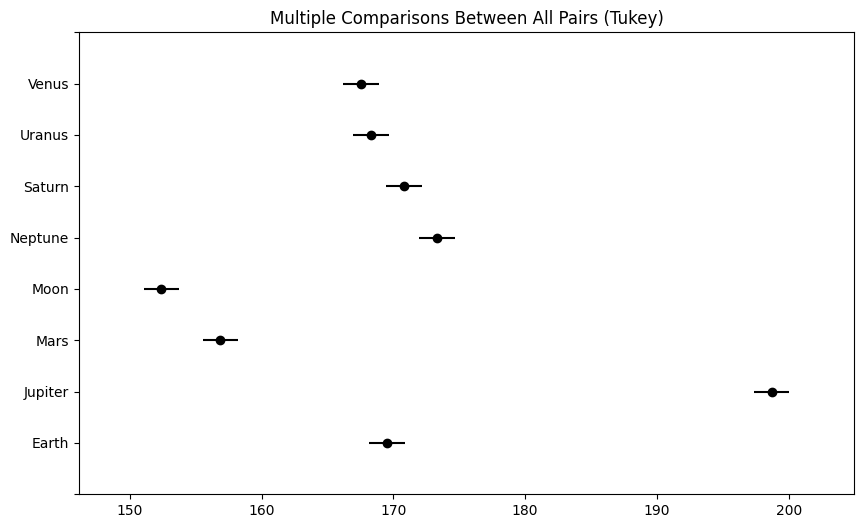

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data["Size"],     # Data
                          groups=data["Planet"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

On voit que Venus, Uranus et Saturne sont finalement encore assez proches de la Terre en terme de tailles des habitants (le test renvoir "False"). On va donc pouvoir économiser un peu en garder les mêmes uniformes pour ces trois là, mais il va falloir s'adapter pour les autres...

### 3. Un monde Bayesien

Des images valent mieux qu'un long discours (mais on peut en discuter...)

<a>
<img src="https://i.imgflip.com/7gci1g.jpg" width=40%/>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/60/Fda_-_inf%C3%A9rence_bay%C3%A9sienne_%28fr%29_-_Bayes_vs_Frequentist.png" width=40%/>
<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png" width=30%/>
</a>

Vous pouvez explorer ce chapitre https://jmeunierp8.github.io/ManuelJamovi/s16.html et la page wikipedia de l'inférence bayesienne https://fr.wikipedia.org/wiki/Inf%C3%A9rence_bay%C3%A9sienne pour découvrir cette autre face du monde des proba.

Illustrez cette approche avec l'exemple suivant :

On observe sur Terre une personne mesurant 132cm. Pensez vous que cette personne est d'origine martienne ou simplement un Terrien de petite taille ?
Grâce à vos accès aux derniers recensements, vous savez que les Martiens sont 50 millions sur Terre et qu'il y a 10 milliards de Terriens... (pour simplifier on négligera ici la présence d'habitants en provenance d'autres planètes).

On a notre observation d=135cm. Notre hypothèse H0 est d'être terrien (car on peut estimer la distribution des tailles des terriens à partir de notre recensement).
Notre prior sur le fait d'être terrien vs martien est une Bernouilli de proba p=10e9/(10e9+50e6)

In [12]:
# On commence par estimer les paramètres de la distribution sur Terre
mean_t = data[data["Planet"]=="Earth"]["Size"].mean()
std_t = data[data["Planet"]=="Earth"]["Size"].std()

print(mean_t,std_t)

169.524852090441 20.288259272809885


In [13]:
# On commence par estimer les paramètres de la distribution sur Mars
mean_m = data[data["Planet"]=="Mars"]["Size"].mean()
std_m = data[data["Planet"]=="Mars"]["Size"].std()

print(mean_m,std_m)

156.8688567989772 20.36628456174916


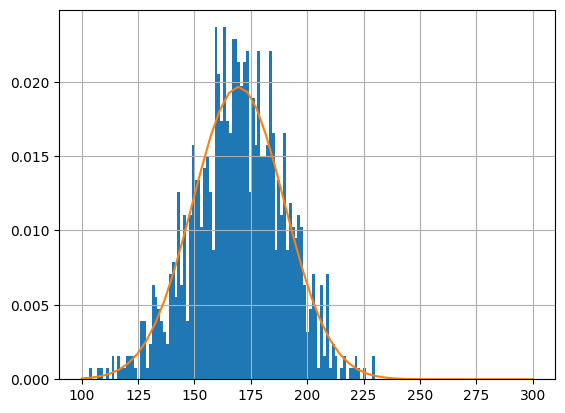

In [14]:
# Regardons si ça fitte bien l'histogramme
data[data["Planet"]=="Earth"]["Size"].hist(bins=100,density=True)
x=np.linspace(100,300)
plt.plot(x,stats.norm.pdf(x,mean_t,std_t))

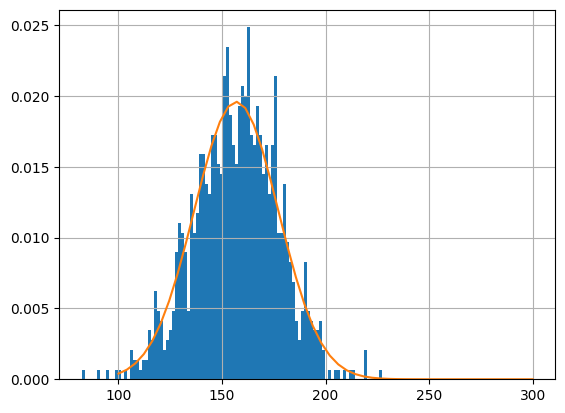

In [15]:
# Regardons si ça fitte bien l'histogramme
data[data["Planet"]=="Mars"]["Size"].hist(bins=100,density=True)
x=np.linspace(100,300)
plt.plot(x,stats.norm.pdf(x,mean_m,std_m))

On applique le facteur de Bayes $$\frac{p(d|H_0)*p(H_0)}{p(d|H_1)*p(H_1)}$$
où 

- $p(d|H_0)$ est la probalité d'observer notre mesure (ici la taille 135) sous $H_0$ (donc via la pdf fittée sur la population terrestre)
- $p(d|H_1)$ est la probalité d'observer notre mesure (ici la taille 135) sous $H_1$ (donc via la pdf fittée sur la population martienne)
- $p(H_0)$ est la proba d'être un Terrien sur Terre soit 10e9/(10e9+50e6) = 0.995
- $p(H_1)$ est la proba d'être un Marsien sur Terre soit 50e6/(10e9+50e6) = 0.005

In [16]:
p_h0=10e9/(10e9+50e6)
p_h1=50e6/(10e9+50e6)
p=(stats.norm.pdf(135,mean_t,std_t)*p_h0) / (stats.norm.pdf(135,mean_m,std_m)*p_h1)
print(p)

83.99324857652987


On a 84 fois plus de proba d'avoir affaire à un Terrien qu'à un Martien.

In [17]:
## comparons à un raisonnement frequentiste:
pval = stats.norm.cdf(135,mean_t,std_t)
print(pval)

0.0444043251672665


On voit que si on s'était fixé un $\alpha$ de 0.05, on aurait rejeté l'hypothèse nulle, autrement dit on aurait parié sur un Martien


### 3. Bonus du Bonus : Pour ceux qui veulent briller demain en cours de regression linéaire...

On s'apprête à créer une station spatiale artificielle Aurora, située entre la Terre et Mars, à 200M de km du Soleil. La gravité artificielle sur Aurora sera de 7 $m/s^{-2}$. Sauriez vous prédire la taille moyenne des futures habitants d'Aurora ?



On va chercher ici une relation entre la taille des individus et les paramètres des planètes/lunes/station.

Pour cela on peut commencer par plotter les nuages de points de la taille en fonction de la gravité et de la distance au soleil

Text(0, 0.5, 'Size (cm)')

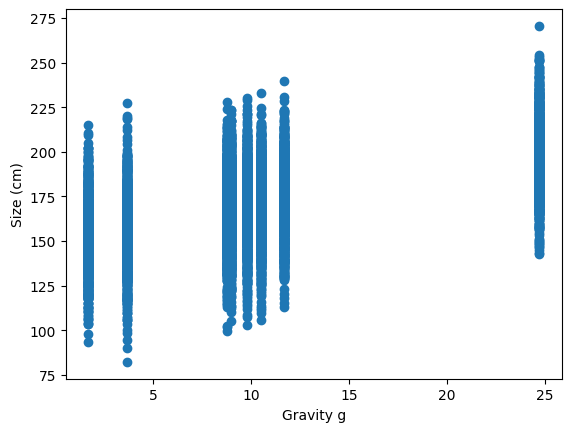

In [18]:
plt.scatter(data["Gravity"],data["Size"])
plt.xlabel("Gravity g")
plt.ylabel("Size (cm)")

Text(0, 0.5, 'Size (cm)')

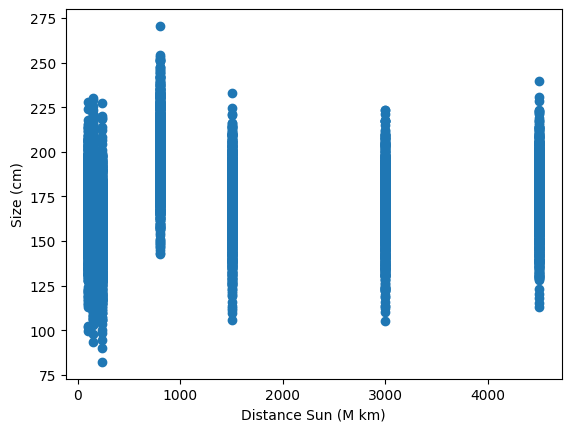

In [19]:
plt.scatter(data["DistanceSun"],data["Size"])
plt.xlabel("Distance Sun (M km)")
plt.ylabel("Size (cm)")

La gravité semble avoir une influence linéaire sur la taille (les nuages de populations semblent évoluer selon une légère droite) mais pas la distance au Soleil.

On cherche donc une relation linéaire de type taille = a * g + b, où les inconnues sont a et b.

Pour cela on va donc utiliser la fameuse régression linéaire !!

In [20]:
from sklearn import linear_model

# Initialisation
regression_model = linear_model.LinearRegression()

# Fit
regression_model.fit(X = pd.DataFrame(data["Gravity"]),  # Note on est obligé de remettre la série data["Gravity"] dans un DataFrame car X doit être 2D (matrice)
                     y = data["Size"])

print("b estimé: ", regression_model.intercept_)

print("a estimé: ", regression_model.coef_)

# Taille prédite
print("La taille moyenne sur Aurora est prédite à :", regression_model.predict(np.array([[7]]))[0], "cm")

b estimé:  149.67847861789195
a estimé:  [2.00302917]
La taille moyenne sur Aurora est prédite à : 163.69968283141736 cm


/home/raphael/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Le vrai modèle utilisé était : taille_moyenne = 150 + 2 * g 

On est pas trop mal !

(Note : Ce n'est bien sûr pas la vraie loi physique de l'influence de la gravité sur la taille des habitants d'une planète, mais la formule secrète de mes données complètements truquées...)


On peut appliquer cette formule sur la gravité de Aurora (7 m/s-2) et obtient 164. On s'attend donc à ce que la taille moyenne sur Aurora soit de 164cm.

**Bravo vous venez de faire du Machine Learning :**

**Vous avez appris grâce à des données une relation qui vous permet de faire une prédiction lorsque vous recevez de nouvelles données...**

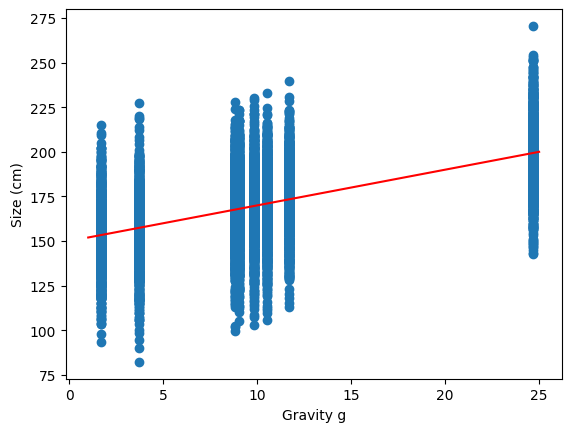

In [21]:

# On peut afficher la relation linéaire, on voit qu'elle semble effectivement bien expliquer les données
plt.scatter(data["Gravity"],data["Size"])
plt.xlabel("Gravity g")
plt.ylabel("Size (cm)")
plt.plot(np.arange(1,26),150+2*np.arange(1,26),c='r')